# Reflection Verification: Comparing FEM against Shigley Stress Concentration Estimates
## Outcomes:
## 1. Apply FEM Complex geometry
## 2. As mesh is made finer the geometry is better approximated - look at hole
## 3. As mesh is made finer the solution becomes more accurate
## 4. Approximation of the stress concentration is related to the stress concentration approximation used in Shigley - to show FEM results are sensible!

## Example problem:

## A plate with a hole at its centre is exposed to uniform tension as shown below:

<img src="SC_prob_diag2.jpg" style="width: 500px;"/>

## The thickness of the plate is 1mm. The aim of the investigation is to determine the stress concentration around the hole, given the uniform loading of the plate. "Shigley's" gives a macroscopic and empirical estimate for this scenario. Recall from MOW227 that 
## $$
K_t = \frac{\sigma_{max}}{\sigma_{nom}},
$$
## where $\sigma_{nom}$ is the stress computed using the cross sectional plate area ($40\times 1$ mm$^2$) minus the cross sectional hole area $20\times 1$ mm$^2$, with
## $$
K_t = 3 − 3.14(\frac{d}{W})+3.667(\frac{d}{W})^2−1.527(\frac{d}{W})^3 
$$
## $K_t = 2.156$
## Confirm that the maximum stress estimate is around $\sigma_{xx} = 10.78$ MPa.

## Given that there is a fair deal of symmetry in the problem, instead of modelling the whole structure we only model the top right quarter of the problem as indicated by the figure below.

<img src="SC_prob_diag3.jpg" style="width: 500px;"/>

## What boundary conditions do we require on the vertical (A) and horizontal (B) edges?
## Do we expect the vertical edge (A) to move left and right?
## Do we expect the vertical edge (A) to move up and down?
## Do we expect the horizontal edge (B) to move left and right?
## Do we expect the horizontal edge (B) to move up and down?
## A roller allows us to to move along one direction, whilst being restricted to move in the other direction
## Convince yourself that the configuration below is equivalent to solving the full problem

<img src="SC_prob_diag4.jpg" style="width: 500px;"/>

## An input file: "q8_platehole_1x1.inp" is given, confirm that the boundary conditions are correctly defined. Compare the stress concentration factor estimated from FEM to Shigley estimate.

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0020 seconds.
Done assembling K and F    :   0.0060 seconds.
Done solving system        :   0.0000 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   0.0020 seconds.
Done post-processing stress:   0.0020 seconds.
Done writing output        :   0.0010 seconds.


<IPython.core.display.Javascript object>


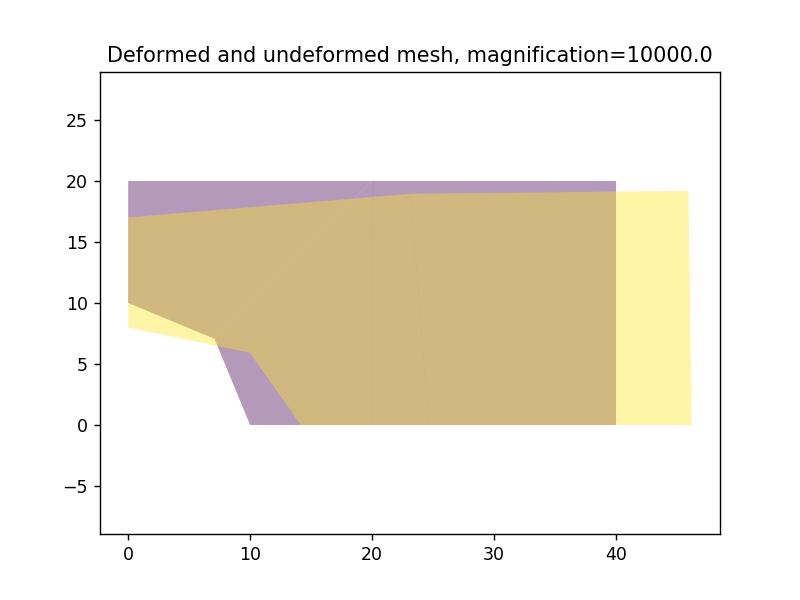

<IPython.core.display.Javascript object>


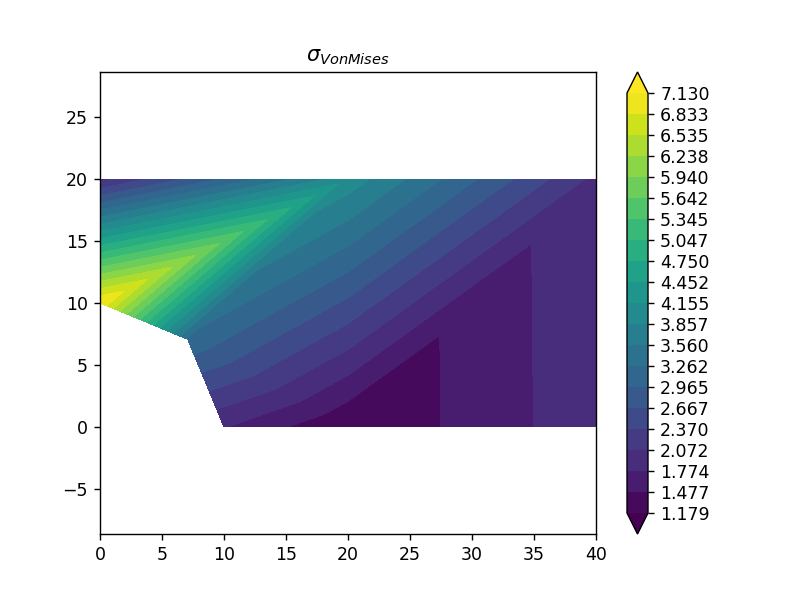

<IPython.core.display.Javascript object>


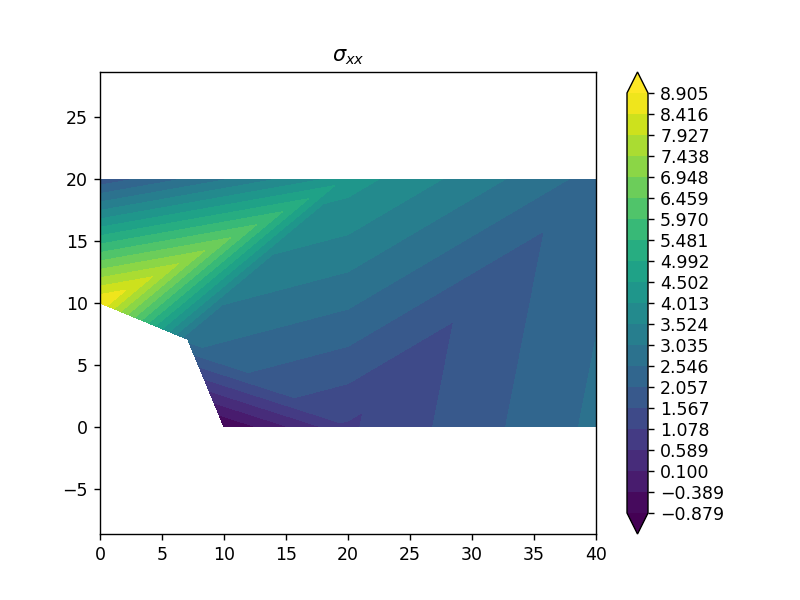

<IPython.core.display.Javascript object>


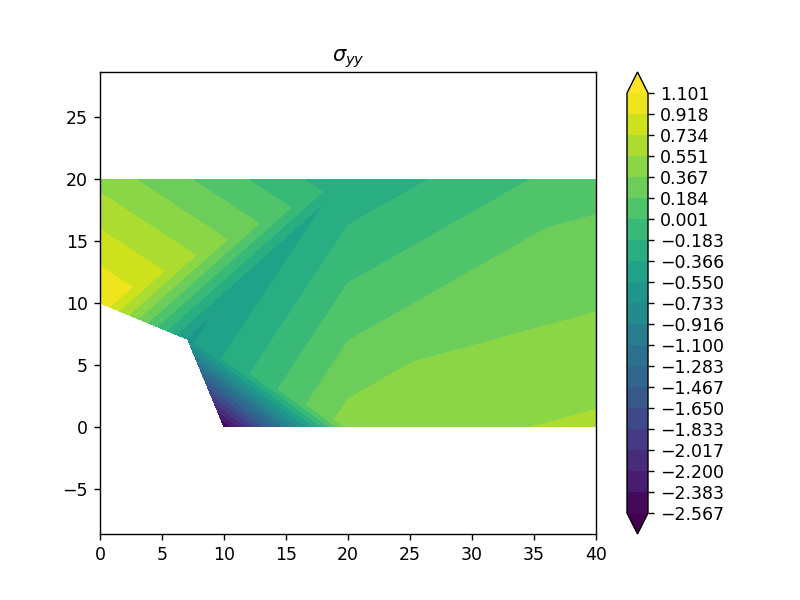

<IPython.core.display.Javascript object>


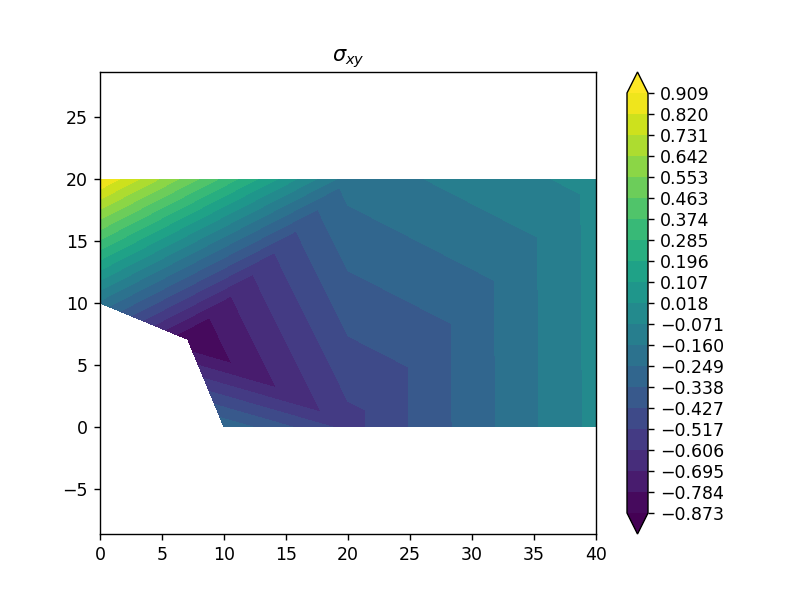

Kt estimate: 1.7810378316998066


In [23]:
%matplotlib notebook

import numpy as np
from fem_main_program import launch_fem
U4L1, ReactionForces, VonMises4L1, SXX, SYY, SXY = launch_fem('q8_platehole_1x1',MagFac=1E4)

print('Kt estimate: {}'.format(np.max(SXX)/5))

< additional notes and observations here >

## Now an input file "q8_platehole_8x8.inp" is given. Run the analysis and again determine the stress concentration factor around the hole. Compare the value to that of "Shigley's". What do you notice?

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.0097 seconds.
Done assembling K and F    :   0.2533 seconds.
Done solving system        :   0.0060 seconds.
Done computing reactions   :   0.0010 seconds.
Done computing stresses    :   0.1037 seconds.
Done post-processing stress:   0.0549 seconds.
Done writing output        :   0.0080 seconds.


<IPython.core.display.Javascript object>


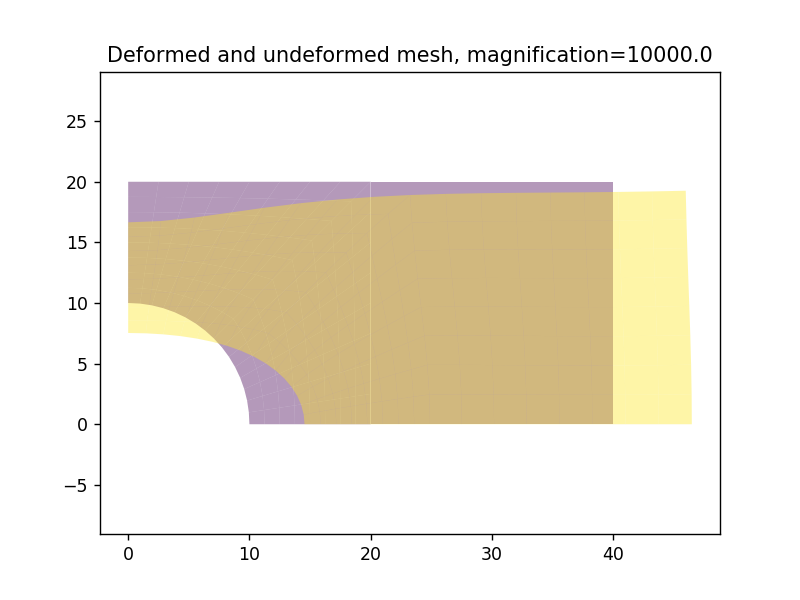

<IPython.core.display.Javascript object>


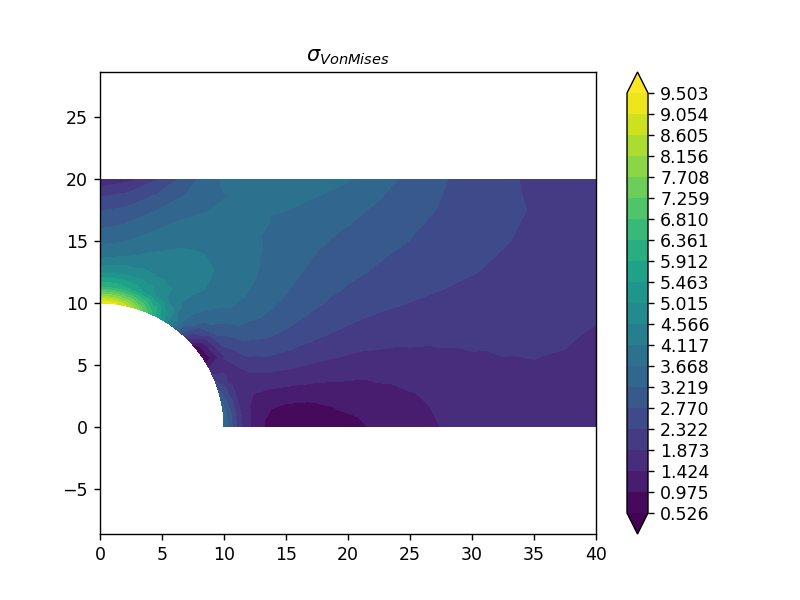

<IPython.core.display.Javascript object>


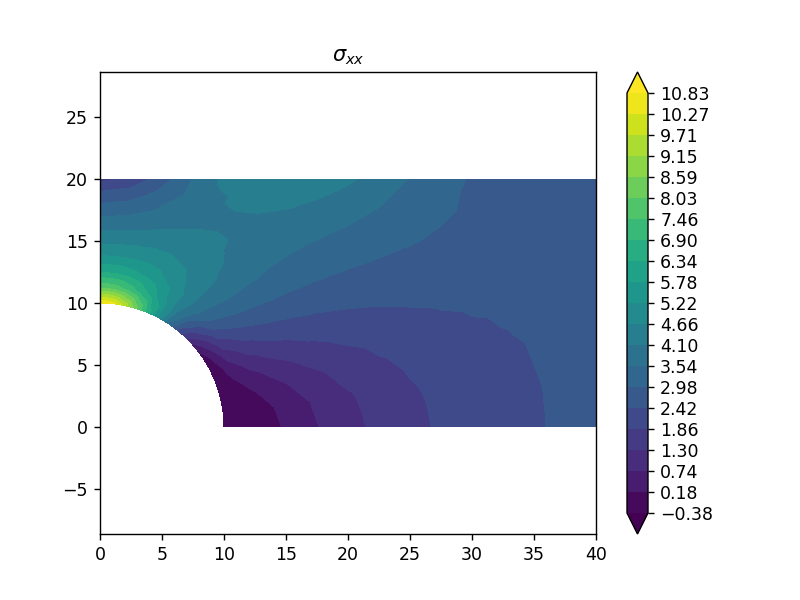

<IPython.core.display.Javascript object>


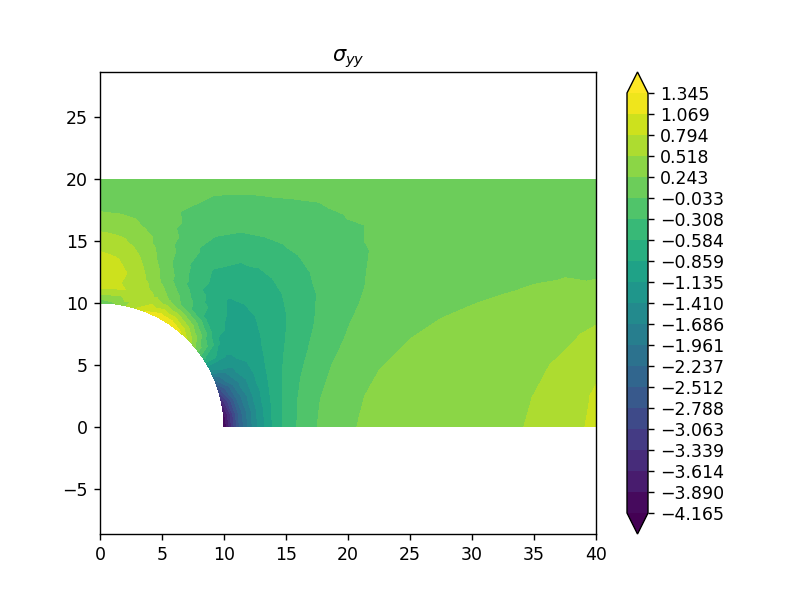

<IPython.core.display.Javascript object>


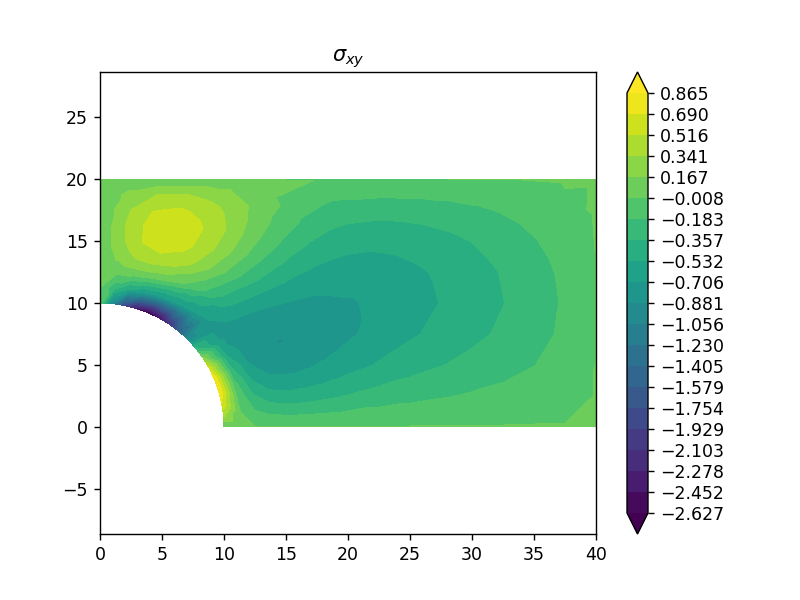

Kt estimate: 2.1657724076206497


In [24]:
%matplotlib notebook
from fem_main_program import launch_fem
U4L1, ReactionForces, VonMises4L1, SXX, SYY, SXY = launch_fem('q8_platehole_8x8',MagFac=1E4)

print('Kt estimate: {}'.format(np.max(SXX)/5))

## Lastly, the input file "q8_platehole_64x64.inp" is given. Run the analysis (this one may take a bit of time) and again determine the stress concentration factor around the hole. 

 
 
 
-----------------------------------------------
MKM321: Two-Dimensional Linear Finite Element Program
-----------------------------------------------
-----------------------------------------------
Done processing input file :   0.1526 seconds.
Done assembling K and F    :  16.2536 seconds.
Done solving system        :   3.1725 seconds.
Done computing reactions   :   0.0000 seconds.
Done computing stresses    :   6.6686 seconds.
Done post-processing stress:   3.5418 seconds.
Done writing output        :   0.3910 seconds.


<IPython.core.display.Javascript object>


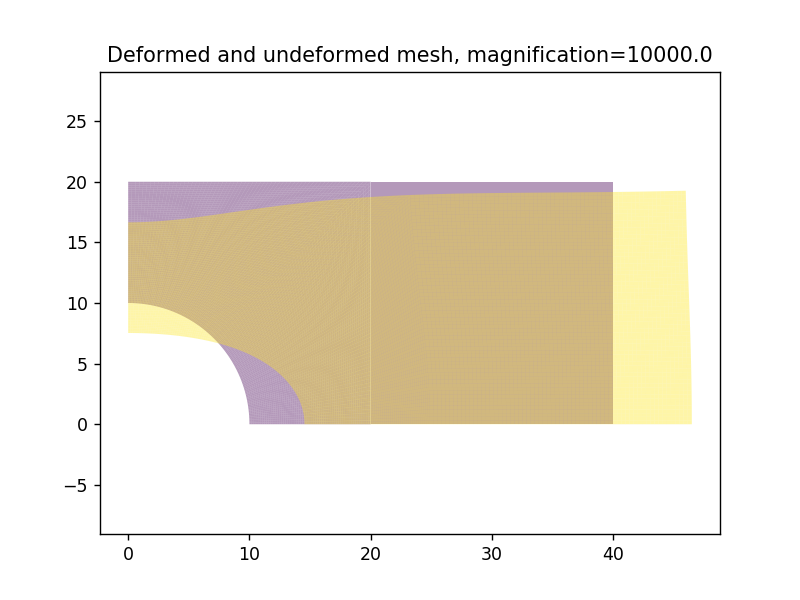

<IPython.core.display.Javascript object>


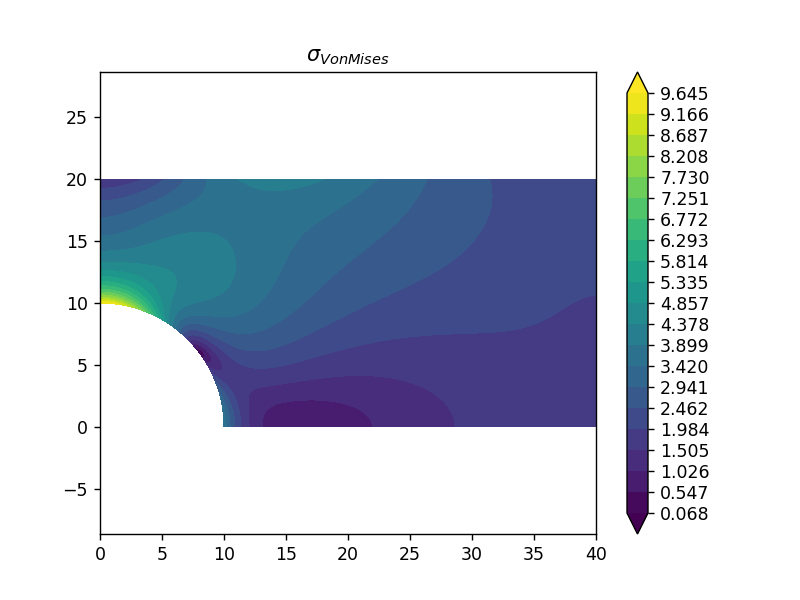

<IPython.core.display.Javascript object>


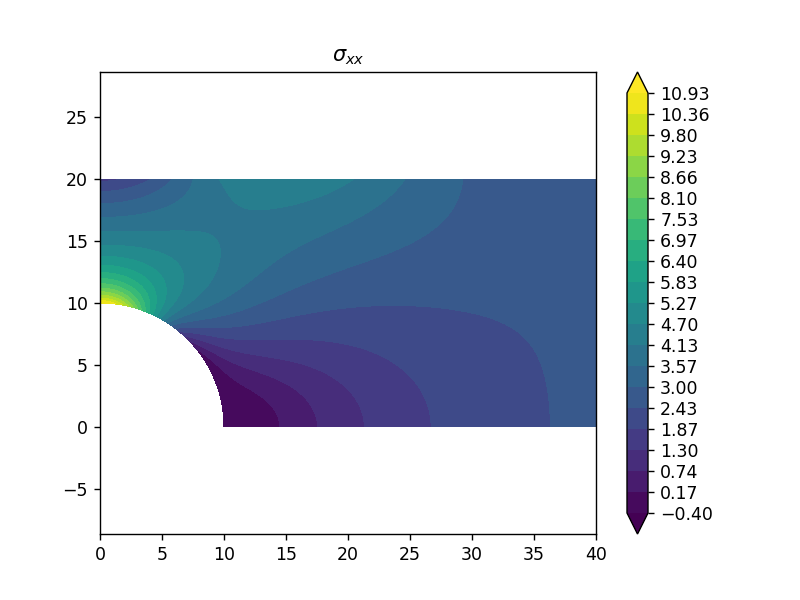

<IPython.core.display.Javascript object>


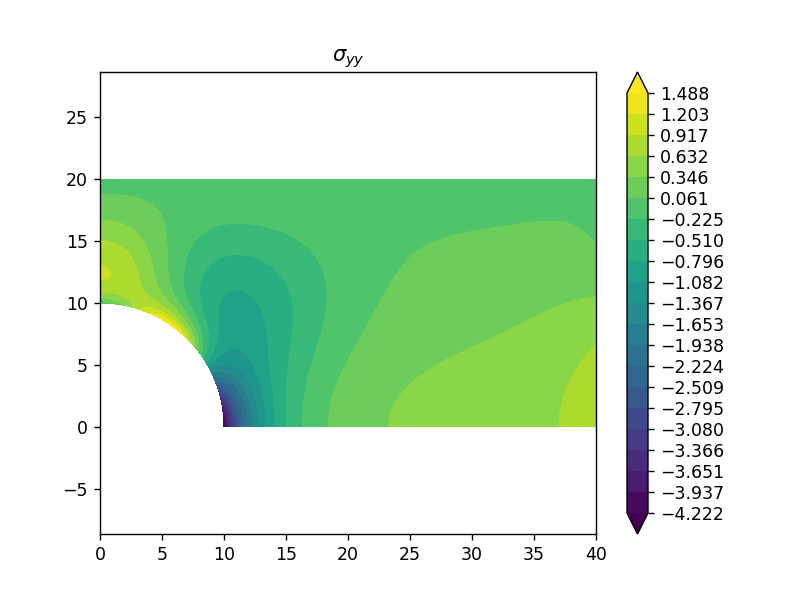

<IPython.core.display.Javascript object>


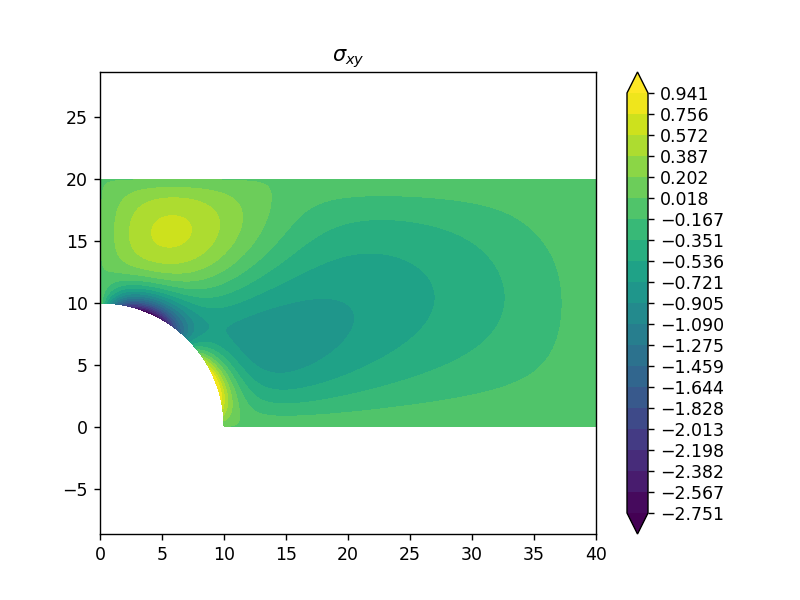

Kt estimate: 2.185951128145889


In [25]:
%matplotlib notebook
from fem_main_program import launch_fem
U4L1, ReactionForces, VonMises4L1, SXX, SYY, SXY = launch_fem('q8_platehole_64x64',MagFac=1E4)

print('Kt estimate: {}'.format(np.max(SXX)/5))

## Discussion points

## 1. Do the analytical FEM solutions correspond to the "Shigley's" estimates? 
## 2. How should one consider the practical restrictions of computational time vs. problem resolution? 

## Yes - FEM estimates are related to Shigley estimates - FEM seems slightly larger than Shigley estimate.
## First K_t estimate = 1.78 computed in 0.025 seconds
## Second K_t estimate = 2.166 computed in 1.3 seconds
## Third K_t estimate = 2.186 computed in 100 seconds
## Difference 2.166 and 2.186 is 1%, which is more accurate than what most material properties and loadings are known.
## Mesh too coarse it poorly approximates solution
## Mesh too fine we wait to long
## Computing both the first and second estimate is a fraction of the third estimate
## Practical strategy - start with coarse mesh and make it finer and stop as changes in estimate is small.